# Day 11 Assignment - Hitik Panchal

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib import pyplot

# Reading the Data

In [3]:
gen_data=pd.read_csv('general_data.csv') 
gen_data.head() 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

# Cleaning the Data

In [5]:
gen_data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [6]:
gen_data.fillna(0 , inplace=True)

In [7]:
gen_data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [8]:
gen_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [9]:
gen_data.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


# Attrition Corelation

In [10]:
gen_data.Attrition = gen_data.Attrition.replace('No', 0)

gen_data.Attrition = gen_data.Attrition.replace('Yes', 1)

In [11]:
gen_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


__Correlation 1 :__ Correlation between Attrition and Age 

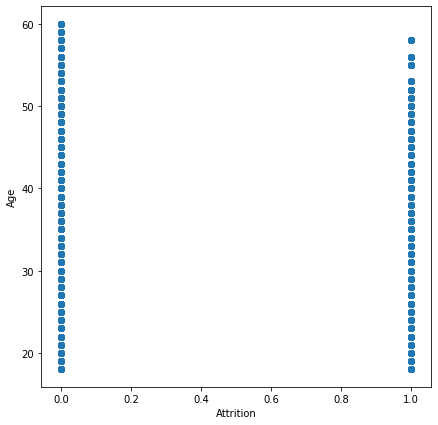

In [45]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("Age")
pyplot.scatter( gen_data['Attrition'], gen_data['Age'])
pyplot.show()

In [73]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['Age'])
print('Pearsons correlation: %.3f' % corr)
print("Negative Correlation")

Pearsons correlation: -0.159
Negative Correlation


__Correlation 2 :__ Correlation between Attrition and Distance from Home 

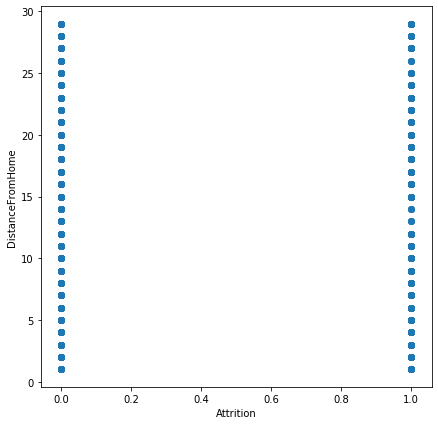

In [47]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("DistanceFromHome")
pyplot.scatter( gen_data['Attrition'], gen_data['DistanceFromHome'])
pyplot.show()

In [72]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['DistanceFromHome'])
print('Pearsons correlation: %.3f' % corr)
print("Negative Correlation")

Pearsons correlation: -0.010
Negative Correlation


__Correlation 3 :__ Correlation between Attrition and Number of Companies Worked	 

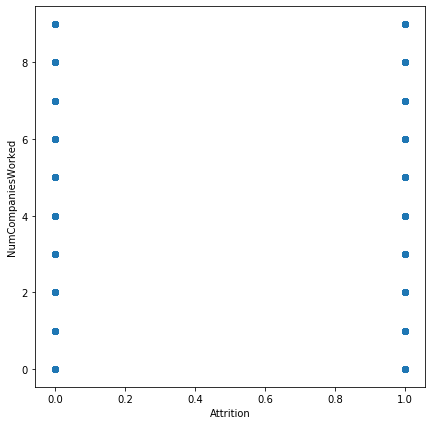

In [49]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("NumCompaniesWorked")
pyplot.scatter( gen_data['Attrition'], gen_data['NumCompaniesWorked'])
pyplot.show()

In [74]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['NumCompaniesWorked'])
print('Pearsons correlation: %.3f' % corr)
print("Positive Correlation")

Pearsons correlation: 0.042
Positive Correlation


__Correlation 4 :__ Correlation between Attrition and Education Level

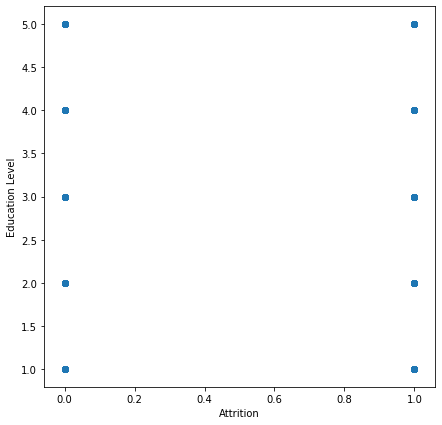

In [51]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("Education Level")
pyplot.scatter( gen_data['Attrition'], gen_data['Education'])
pyplot.show()

In [71]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['Education'])
print('Pearsons correlation: %.3f' % corr)
print("Negative Correlation")

Pearsons correlation: -0.015
Negative Correlation


__Correlation 5 :__ Correlation between Attrition and Percent Salary Hike 

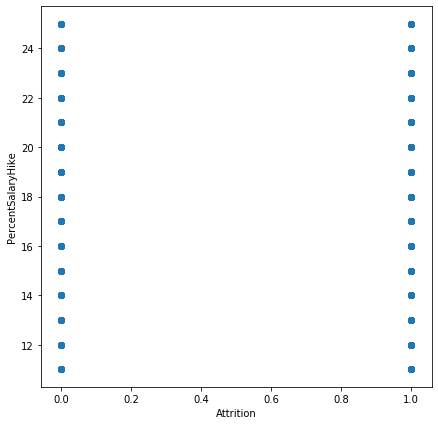

In [53]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("PercentSalaryHike")
pyplot.scatter( gen_data['Attrition'], gen_data['PercentSalaryHike'])
pyplot.show()

In [75]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['PercentSalaryHike'])
print('Pearsons correlation: %.3f' % corr)
print("Positive Correlation")

Pearsons correlation: 0.033
Positive Correlation


__Correlation 6 :__ Correlation between Attrition and Total Working Years

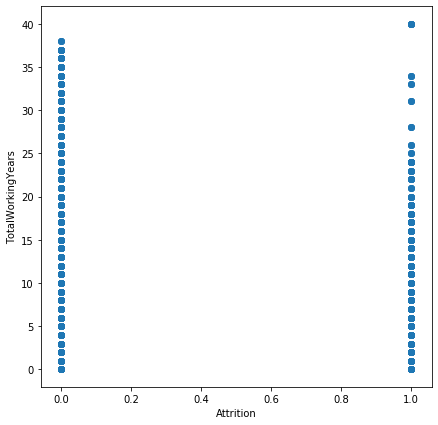

In [56]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("TotalWorkingYears")
pyplot.scatter( gen_data['Attrition'], gen_data['TotalWorkingYears'])
pyplot.show()

In [70]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['TotalWorkingYears'])
print('Pearsons correlation: %.3f' % corr)
print("Negative Correlation")

Pearsons correlation: -0.170
Negative Correlation


__Correlation 7 :__ Correlation between Attrition and Training Times Last Year

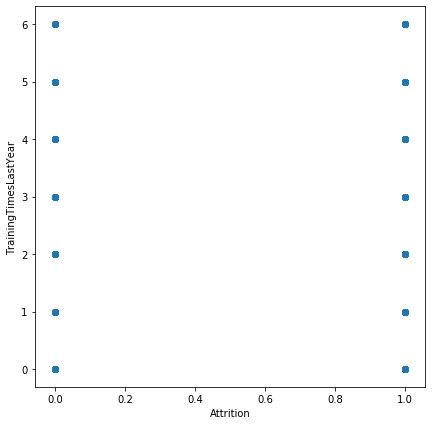

In [57]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("TrainingTimesLastYear")
pyplot.scatter( gen_data['Attrition'], gen_data['TrainingTimesLastYear'])
pyplot.show()

In [69]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['TrainingTimesLastYear'])
print('Pearsons correlation: %.3f' % corr)
print("Negative Correlation")

Pearsons correlation: -0.049
Negative Correlation


__Correlation 8 :__ Correlation between Attrition and Years At Company 

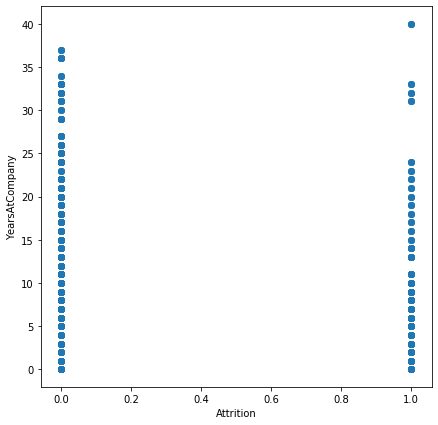

In [61]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("YearsAtCompany")
pyplot.scatter( gen_data['Attrition'], gen_data['YearsAtCompany'])
pyplot.show()

In [68]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['YearsAtCompany'])
print('Pearsons correlation: %.3f' % corr)
print("Negative Correlation")

Pearsons correlation: -0.134
Negative Correlation


__Correlation 9 :__ Correlation between Attrition and Years Since Last Promotion

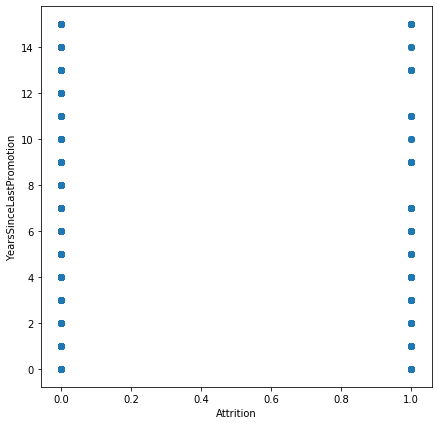

In [62]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("YearsSinceLastPromotion")
pyplot.scatter( gen_data['Attrition'], gen_data['YearsSinceLastPromotion'])
pyplot.show()

In [67]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['YearsSinceLastPromotion'])
print('Pearsons correlation: %.3f' % corr)
print("Negative Correlation")

Pearsons correlation: -0.033
Negative Correlation


__Correlation 10 :__ Correlation between Attrition and Years With Current Manager 

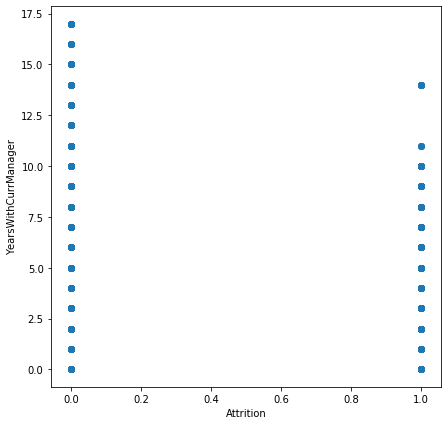

In [64]:
pyplot.figure(figsize=(7,7))
pyplot.xlabel("Attrition")
pyplot.ylabel("YearsWithCurrManager")
pyplot.scatter( gen_data['Attrition'], gen_data['YearsWithCurrManager'])
pyplot.show()

In [66]:
corr,p = pearsonr(gen_data['Attrition'], gen_data['YearsWithCurrManager'])
print('Pearsons correlation: %.3f' % corr)
print("Negative Correlation")

Pearsons correlation: -0.156
Negative Correlation


__All the above correlations are partial correlations.__